In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
reg = pd.read_csv('/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/searchlight_regions.csv')

In [22]:
reg.head()

,subj,space,region
0,1,latent,Left FuG fusiform gyrus
1,1,latent,Left Cerebral White Matter
2,1,latent,Left Cerebral White Matter
3,1,latent,Left MFG middle frontal gyrus
4,2,latent,Right Inf Lat Vent


In [23]:
def clean_string(s):
    s = s.split(' ')
    new_s = s[1] + s[0][0]
    return new_s

reg['reg_short'] = reg['region'].apply(lambda x: clean_string(x))
reg.sort_values(by='reg_short', inplace=True)
reg.head()

,subj,space,region,reg_short
79,10,euclid,Left ACgG anterior cingulate gyrus,ACgGL
12,2,latent,Right AIns anterior insula,AInsR
53,4,euclid,Right AIns anterior insula,AInsR
75,10,euclid,Left Amygdala,AmygdalaL
56,5,euclid,Left CO central operculum,COL


In [24]:
reg['hem'] = reg['reg_short'].apply(lambda x: x[-1])
reg.head()

,subj,space,region,reg_short,hem
79,10,euclid,Left ACgG anterior cingulate gyrus,ACgGL,L
12,2,latent,Right AIns anterior insula,AInsR,R
53,4,euclid,Right AIns anterior insula,AInsR,R
75,10,euclid,Left Amygdala,AmygdalaL,L
56,5,euclid,Left CO central operculum,COL,L


In [25]:
reg['reg_short_nh'] = reg['reg_short'].apply(lambda x: x[0:-1])
reg.head()

,subj,space,region,reg_short,hem,reg_short_nh
79,10,euclid,Left ACgG anterior cingulate gyrus,ACgGL,L,ACgG
12,2,latent,Right AIns anterior insula,AInsR,R,AIns
53,4,euclid,Right AIns anterior insula,AInsR,R,AIns
75,10,euclid,Left Amygdala,AmygdalaL,L,Amygdala
56,5,euclid,Left CO central operculum,COL,L,CO


(array([0, 1]), <a list of 2 Text xticklabel objects>)

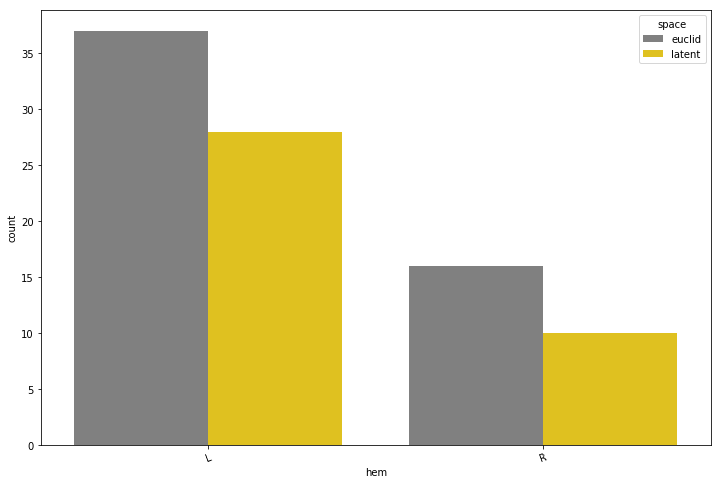

In [26]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='hem', hue='space', palette = ['grey','gold'])
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

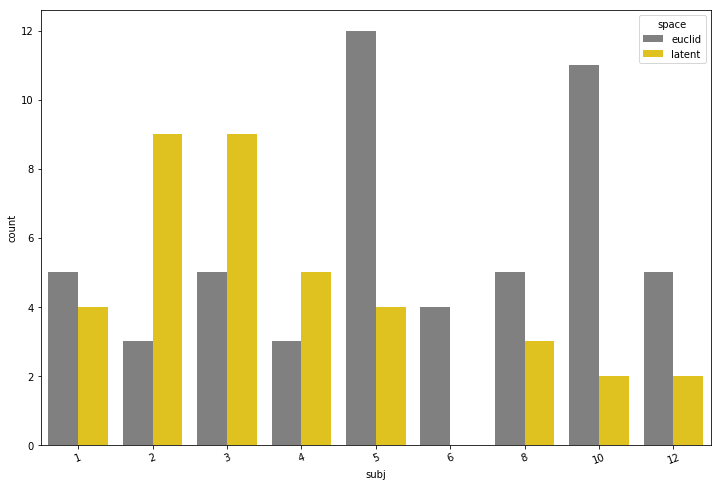

In [27]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='subj', hue='space', palette = ['grey','gold'])
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

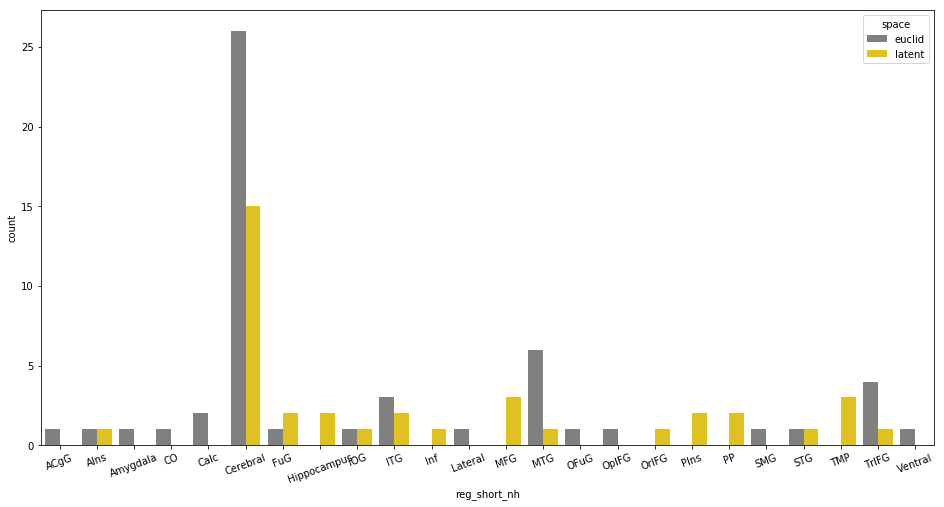

In [28]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=reg, x='reg_short_nh', hue='space', palette = ['grey','gold'])
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

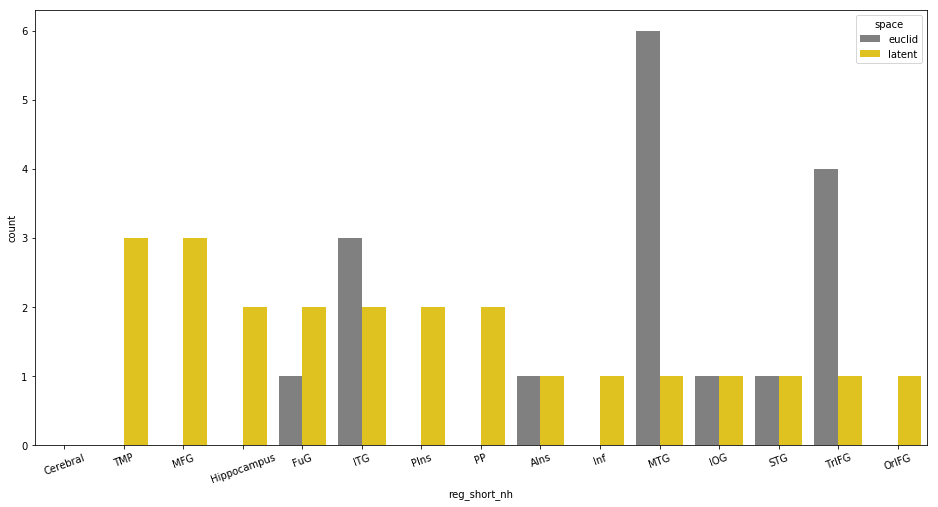

In [39]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=reg[reg['reg_short_nh'] != 'Cerebral'], x='reg_short_nh', hue='space', palette = ['grey','gold'],
             order = reg.loc[reg['space'] == 'latent','reg_short_nh'].value_counts().index)
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

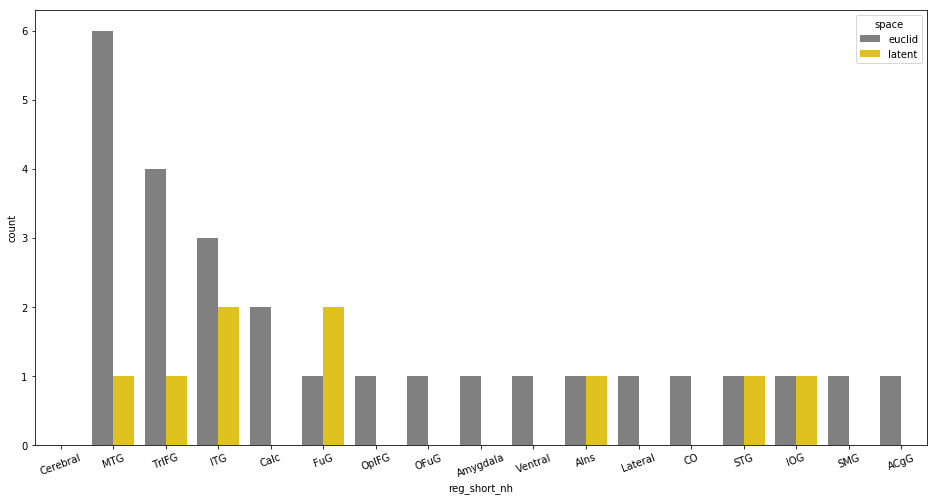

In [40]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=reg[reg['reg_short_nh'] != 'Cerebral'], x='reg_short_nh', hue='space', palette = ['grey','gold'],
             order = reg.loc[reg['space'] == 'euclid','reg_short_nh'].value_counts().index)
plt.xticks(rotation=20)

In [41]:
reg[reg['reg_short_nh'] == 'PP']

,subj,space,region,reg_short,hem,reg_short_nh
27,5,latent,Left PP planum polare,PPL,L,PP
15,3,latent,Left PP planum polare,PPL,L,PP
